## Analysis and Visualisation of Data

Since our data has been gathered from the correct sources, assessed, evaluated, and cleaned for all variables of intrigue, it is conceivable to make solid examination bits of analysis insights, in view of three different questions/leads, as we present beneath.

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.5)

In [2]:
archive = pd.read_csv('twitter_archive_clean.csv')

In [3]:
archive.describe()

,Unnamed: 0,tweet_id,rating_numerator,rating_denominator,confidence,favorite_count,retweet_count
count,1946.000000,1.946000e+03,1946.000000,1946.0,1946.000000,1946.000000,1946.000000
mean,972.500000,7.358983e+17,10.532888,10.0,0.464582,8538.904933,2545.114080
std,561.906131,6.760377e+16,2.174684,0.0,0.339340,12556.372105,4557.473812
min,0.000000,6.660209e+17,0.000000,10.0,0.000000,74.000000,11.000000
25%,486.250000,6.757858e+17,10.000000,10.0,0.140228,1810.250000,562.000000
50%,972.500000,7.084748e+17,11.000000,10.0,0.459130,3839.000000,1220.000000
75%,1458.750000,7.881228e+17,12.000000,10.0,0.775646,10657.000000,2905.000000
max,1945.000000,8.924206e+17,14.000000,10.0,0.999956,160170.000000,80086.000000


## Visualisation 1

### Distribution of Source

Twitter for iPhone    1909
Twitter Web Client      28
TweetDeck                9
Name: source, dtype: int64


Text(0.5, 1.0, 'The Distribution of Source')

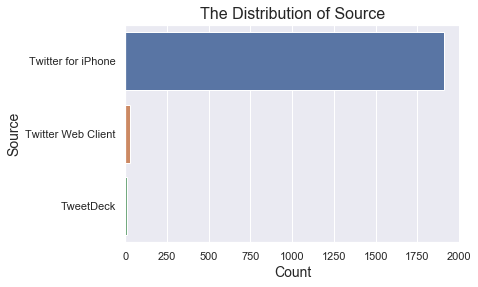

In [4]:
sorted_source = archive['source'].value_counts().index
print(archive['source'].value_counts())

sns.set(style="darkgrid")
sns.countplot(data = archive, y = 'source', order = sorted_source)

plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16)

#### Data Insight 1:

This plot above shows the distribution of source. We can see that the dominate source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the main channel for people using to tweet, retweet, post, and others, while the TweetDesk is pretty rare (less than 1%).

---

## Visualisation 2

### Retweets vs Favorites

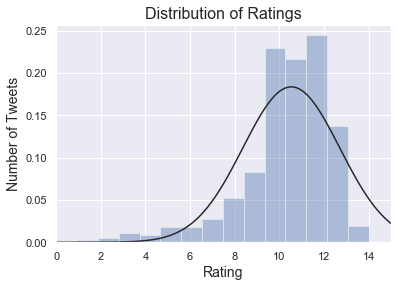

In [5]:
from scipy.stats import norm
sns.distplot(archive['rating_numerator'], fit=norm, kde = False, bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

#### Data Insight 2:

- The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

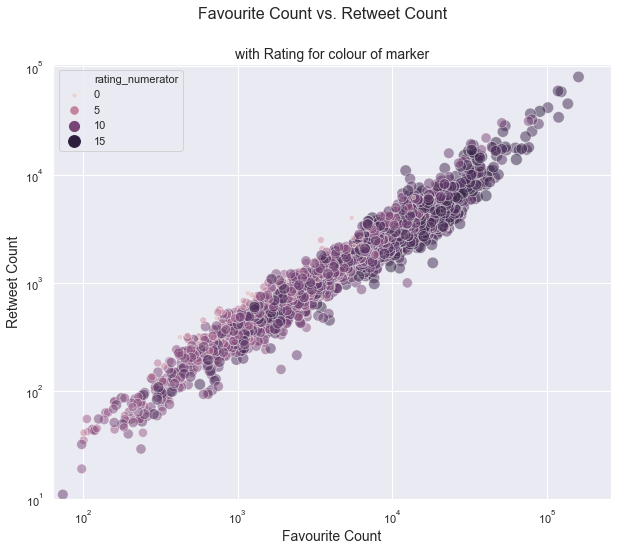

In [6]:
df = archive

plt.figure(figsize = (10, 8))

cmap = sns.cubehelix_palette(dark=1, light=0)

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating_numerator']

sns.scatterplot(x = df['favorite_count'], y = df['retweet_count'], hue = df['rating_numerator'], 
                size = df['rating_numerator'], sizes=(10, 140), alpha = 0.5, data = df)

# title and labels
plt.suptitle('Favourite Count vs. Retweet Count', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favourite Count', fontsize = 14)
plt.ylabel('Retweet Count', fontsize = 14)

plt.show();

#### Data Insight 3:

- The overall picture is the solid positive correlation between retweet counts and favourite counts. It makes sense however, in the event that I 'like' a tweet (favourite it) I am bound to retweet it too. If we check the points plotted on the graph follows unmistakable linear pattern with a positive incline slope, so as favorite count increases so does the retweet count.

---

## Visualisation 3

### Most Tweeted Breed

Since WeRateDogs is known for its unique dog ratings which often surpass the default scoring scale, Which breeds are most tweeted about across the entire set of tweets:

In [7]:
archive['breed'].value_counts().nlargest(10)

Unknown               302
Golden Retriever      154
Labrador Retriever    101
Pembroke               94
Chihuahua              90
Pug                    62
Toy Poodle             49
Chow                   47
Samoyed                41
Pomeranian             40
Name: breed, dtype: int64

In [8]:
# There were 305 tweets where the breed was unidentified - lets remove these from the analysis
archive.loc[archive['breed'] == 'Unknown', 'breed'] = None

In [9]:
archive['breed'].value_counts().nlargest(10)

Golden Retriever      154
Labrador Retriever    101
Pembroke               94
Chihuahua              90
Pug                    62
Toy Poodle             49
Chow                   47
Samoyed                41
Pomeranian             40
Malamute               33
Name: breed, dtype: int64

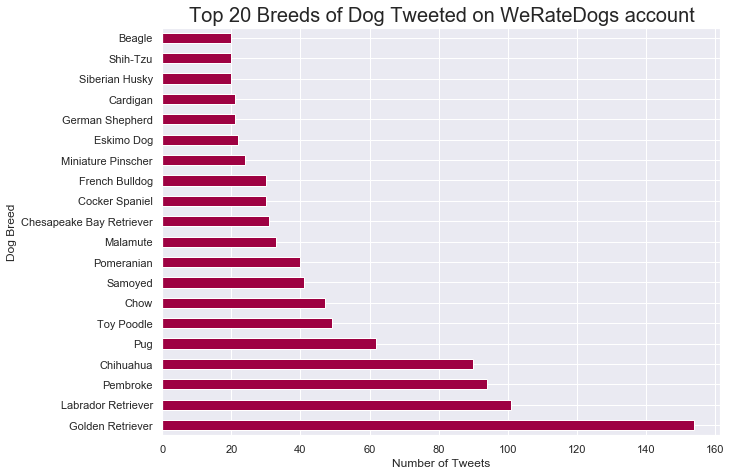

In [10]:
# Plot a horizontal bar chart to show top 20 breeds
fig = plt.figure(figsize=(10,7.5))

cmap = matplotlib.cm.get_cmap('Spectral')

archive.groupby('breed').count()['rating_numerator'].sort_values(ascending=False).nlargest(20).plot(kind='barh', cmap = cmap)
plt.title("Top 20 Breeds of Dog Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Number of Tweets"); 

#### Data Insight 4:

- **We can see the top five tweeted dogs in order are Golden Retriever, Labrador Retriever, Pembroke Welsh Corgi, Chihuahua and Pug.**

- **With the Golden Retriever receiving substantially more tweets at 156 than the other breeds.**

---

## Visualisation 5

### Most Retweets & Most Favourite Names

In [11]:
# construct new temporary dataframe, sorted after retweet count
retweet_high = archive[['tweet_id', 'name', 'retweet_count']].sort_values(by = 'retweet_count', ascending = False)
# drop all dog entries without any known name
retweet_high.drop(index = retweet_high[retweet_high.name == 'None'].index, inplace = True)

# perform analysis on the top 5 most popular entries
retweet_highest_count = retweet_high['retweet_count'][:5].values
retweet_highest_names = retweet_high['name'][:5].values


In [12]:
# construct new temporary dataframe, sorted after fav count
fav_high = archive[['tweet_id', 'name', 'favorite_count']].sort_values(by = 'favorite_count', ascending = False)
# drop all dog entries without any known name
fav_high.drop(index = fav_high[fav_high.name == 'None'].index, inplace = True)

# perform analysis on the top 5 most popular entries
fav_highest_count = fav_high['favorite_count'][:5].values
fav_highest_names = fav_high['name'][:5].values

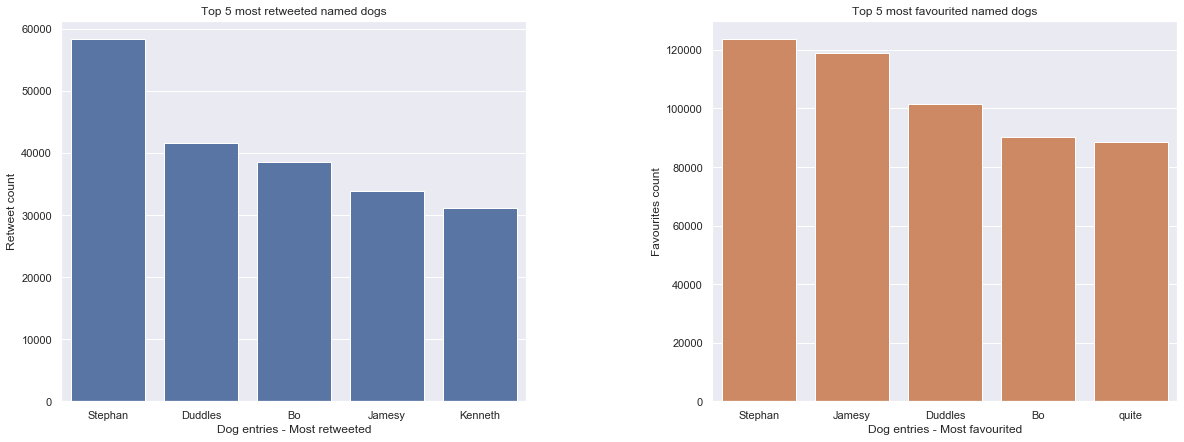

In [13]:
plt.figure(figsize = [20, 7])
plt.subplots_adjust(wspace = 0.4) # adjust spacing between subplots

plt.subplot(1, 2, 1);
ax = sns.barplot(x = retweet_highest_names, y = retweet_highest_count, color = sns.color_palette()[0]);

plt.xlabel('Dog entries - Most retweeted');
plt.ylabel('Retweet count');
plt.title('Top 5 most retweeted named dogs');

plt.subplot(1, 2, 2);
ax = sns.barplot(x = fav_highest_names, y = fav_highest_count, color = sns.color_palette()[1]);

plt.xlabel('Dog entries - Most favourited');
plt.ylabel('Favourites count');
plt.title('Top 5 most favourited named dogs');


#### Data Insight 5:

_Here we have the popularity champions from this dataset:_

- _For the 'retweet' rankings, we have:_
    - __The most retweeted dog name is Stephan, with 56625 retweets__


- _For the 'favorites' rankings, we have:_
    - __The most favourited dog name is Duddles, with 107956 favourites__

